In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./data/sales_data.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

plt.style.use('ggplot')
# sns.set_palette('bright')

df.head()

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


## Sales profit count

<Axes: xlabel='profit', ylabel='Count'>

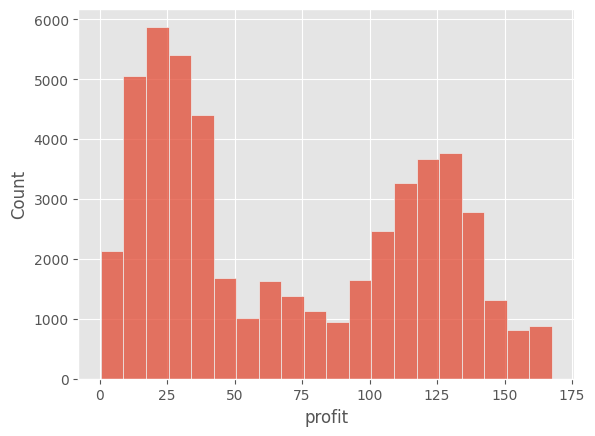

In [57]:
sns.histplot(data=df, x='profit', bins=20)

There are two maximums count of sales, first ont at 25$ and the second one at 125$ of profit. So it could be a price of most popular items.

## Sales profit count by device type

<Axes: xlabel='profit', ylabel='Count'>

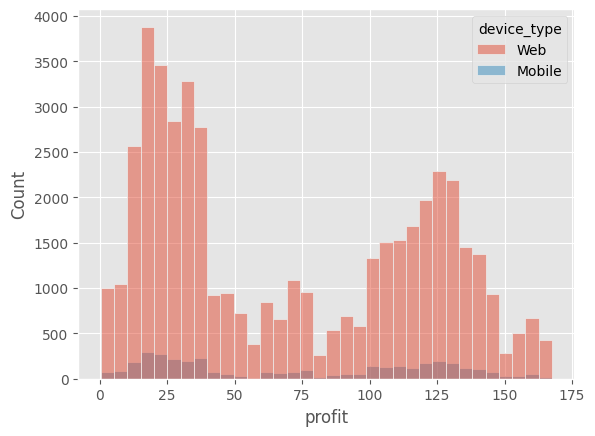

In [58]:
sns.histplot(data=df, x='profit', hue='device_type')

In [63]:
device_df = df.groupby('device_type')['profit'].count()

round(device_df['Mobile'] / df['profit'].count() * 100, 2)

np.float64(7.13)

We see very low amount of sales on mobile devices, it's 7.13% of all sales.

## Sales by date

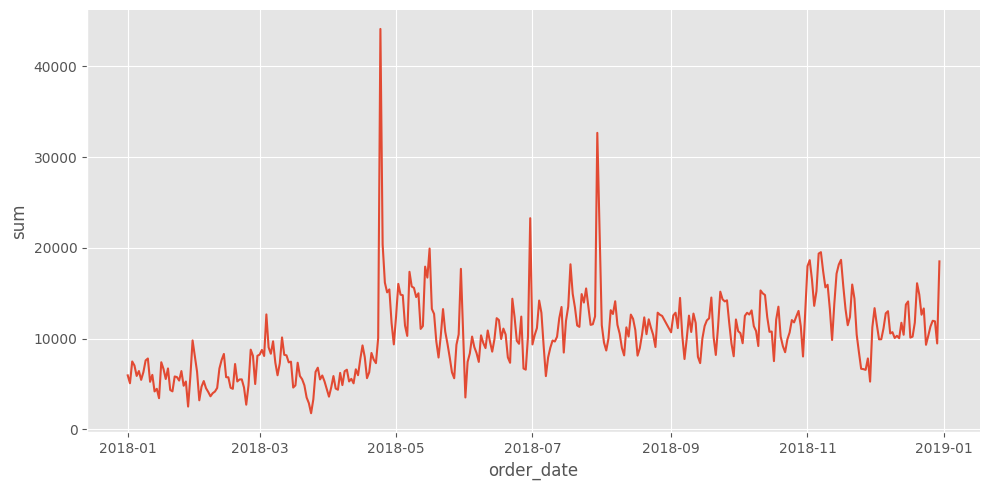

In [86]:
grouped_df = df.groupby('order_date')['profit'].aggregate(['sum'])

sns.relplot(data=grouped_df, x='order_date', y='sum', kind='line', aspect=2)

We see maximum sales in second part of April 2018 it was near 95000$ sales per day. And after that peak average sales increased from 10k to 20k.

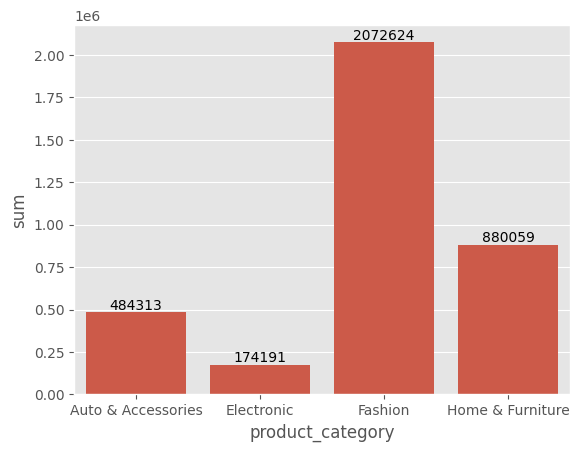

In [117]:
grouped_df = df.groupby('product_category')['profit'].aggregate(['sum'])
barplot = sns.barplot(data=grouped_df, x='product_category', y='sum')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', color='black')

The most profitable category is `Fashion` with 2.07M$ profit and the most unprofitable is `Electronic` with 174k$ profit.

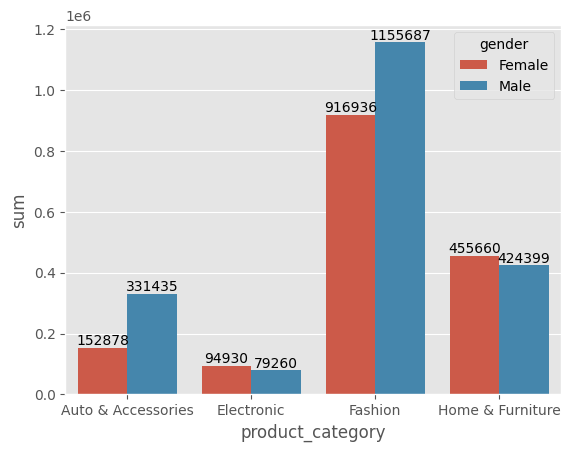

In [118]:
grouped_df = df.groupby(['product_category', 'gender'])['profit'].aggregate(['sum']).reset_index()
barplot = sns.barplot(data=grouped_df, x='product_category', y='sum', hue='gender')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', color='black')

We see that man more often buy `Fashion` and `Auto & Accessories` categories. Woman more often buy `Electronic` and `Home & Furniture` categories but difference is not so big.